In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

# Análise Exploratória dos Dados

## Lendo o dataframe

In [18]:
df = pd.read_csv('listings.csv',encoding = 'utf-8', delimiter=',',low_memory = False)

df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,221,5,260,2021-02-08,2.01,1,304
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,10
2,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.82,11,328
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2020-03-15,2.02,1,207
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,353,2021-02-10,2.79,1,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26610,48269503,Quarto inteiro no Recreio dos Bandeirantes.,389246322,Vivian,NaN,Recreio dos Bandeirantes,-23.01452,-43.46005,Private room,94,1,0,NaN,NaN,4,180
26611,48269534,"Casa grande mobiliada, 2 quartos em Jacarepaguá.",122122028,Victor,NaN,Cidade de Deus,-22.95078,-43.35997,Entire home/apt,141,1,0,NaN,NaN,1,365
26612,48270411,BR-RJ020 Casa Niemeyer vista deslumbrante,13773093,Raphael,NaN,São Conrado,-22.99825,-43.25133,Entire home/apt,2500,3,0,NaN,NaN,1,360
26613,48270514,Casa Tijuca - Curtir e aproveitar o Rio,23737846,Lucas,NaN,Tijuca,-22.92816,-43.24319,Entire home/apt,160,5,0,NaN,NaN,3,269


## Informações do dataframe

Aqui aplicamos a função info() para verificar quais são as variáveis/features do dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26615 entries, 0 to 26614
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26615 non-null  int64  
 1   name                            26586 non-null  object 
 2   host_id                         26615 non-null  int64  
 3   host_name                       26591 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26615 non-null  object 
 6   latitude                        26615 non-null  float64
 7   longitude                       26615 non-null  float64
 8   room_type                       26615 non-null  object 
 9   price                           26615 non-null  int64  
 10  minimum_nights                  26615 non-null  int64  
 11  number_of_reviews               26615 non-null  int64  
 12  last_review                     

## Contando valores de algumas variáveis nominais

In [7]:
df.room_type.value_counts()

Entire home/apt    19285
Private room        6619
Shared room          612
Hotel room            99
Name: room_type, dtype: int64

In [19]:
df.neighbourhood.value_counts()

Copacabana         7712
Barra da Tijuca    2724
Ipanema            2572
Jacarepaguá        1335
Botafogo           1222
                   ... 
Vila Kosmos           1
Honório Gurgel        1
Gericinó              1
Zumbi                 1
Acari                 1
Name: neighbourhood, Length: 151, dtype: int64

In [20]:
df.neighbourhood.unique()

array(['Copacabana', 'Ipanema', 'Barra da Tijuca', 'Flamengo',
       'Santa Teresa', 'Gávea', 'Leblon', 'Jacarepaguá', 'Campo Grande',
       'Laranjeiras', 'Humaitá', 'São Conrado', 'Botafogo', 'Centro',
       'Vidigal', 'Santo Cristo', 'Itanhangá', 'São Cristóvão',
       'Maracanã', 'Glória', 'Tijuca', 'Lagoa', 'São Francisco Xavier',
       'Catete', 'Pitangueiras', 'Marechal Hermes', 'Jardim Botânico',
       'Senador Camará', 'Irajá', 'Vargem Grande',
       'Recreio dos Bandeirantes', 'Leme', 'Anil', 'Vargem Pequena',
       'Estácio', 'Cosme Velho', 'Gardênia Azul', 'Taquara', 'Bangu',
       'Urca', 'Grajaú', 'Joá', 'Alto da Boa Vista', 'Penha Circular',
       'Vila Isabel', 'Jardim Sulacap', 'Praça da Bandeira', 'Encantado',
       'Rio Comprido', 'Lins de Vasconcelos', 'Cosmos', 'Santíssimo',
       'Gamboa', 'Bonsucesso', 'Camorim', 'Piedade', 'Vila da Penha',
       'Olaria', 'Vila Valqueire', 'Cidade de Deus', 'Riachuelo',
       'Barra de Guaratiba', 'Praça Seca', 'Pa

## Descrição estatística do dataframe

Foram indentificados alguns outliers no dataframe. As variáveis price, minimum_nights, number_of_reviews, reviews_per_month e availability_365.

In [16]:
df.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.661500e+04,2.661500e+04,0.0,26615.000000,26615.000000,26615.000000,26615.000000,26615.000000,16657.000000,26615.000000,26615.000000
mean,2.526448e+07,1.006657e+08,NaN,-22.965837,-43.248533,742.589254,4.725268,12.146308,0.629190,9.665414,219.438174
std,1.573416e+07,1.090670e+08,NaN,0.034971,0.096296,5368.868834,19.102522,29.722813,0.876064,35.942124,141.525405
min,1.787800e+04,3.607000e+03,NaN,-23.072920,-43.704790,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,1.220219e+07,1.431500e+07,NaN,-22.984570,-43.304090,157.000000,1.000000,0.000000,0.090000,1.000000,88.000000
50%,2.374090e+07,6.026326e+07,NaN,-22.971700,-43.196210,280.000000,2.000000,2.000000,0.270000,1.000000,254.000000
75%,4.089613e+07,1.546962e+08,NaN,-22.951575,-43.186300,550.000000,4.000000,9.000000,0.850000,3.000000,363.000000
max,4.827600e+07,3.892463e+08,NaN,-22.749820,-43.104860,625216.000000,1000.000000,446.000000,29.530000,295.000000,365.000000


## Distribuição de variáveis numéricas

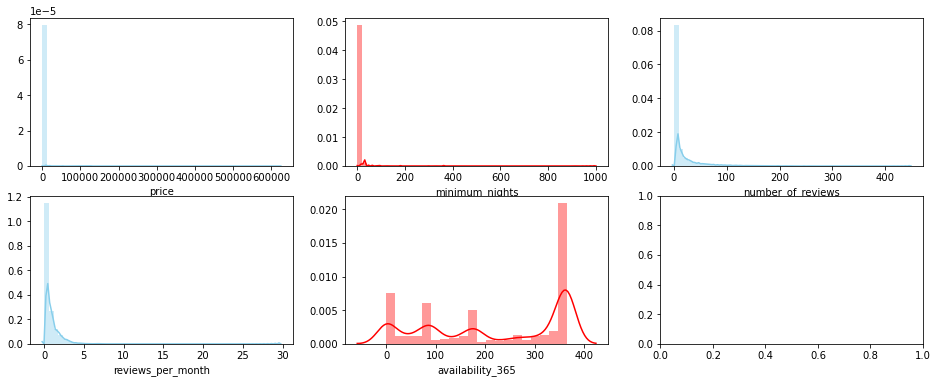

In [26]:
fig, axes = plt.subplots(2, 3, figsize=(16, 6))

sns.distplot(df['price'] , color = 'skyblue', label = 'price', ax = axes[0,0])
sns.distplot(df['minimum_nights'] , color = 'red', label = 'minimum_nights', ax = axes[0,1])
sns.distplot(df['number_of_reviews'] , color = 'skyblue', label = 'number_of_reviews', ax = axes[0,2])
sns.distplot(df['reviews_per_month'] , color = 'skyblue', label = 'reviews_per_month', ax = axes[1,0])
sns.distplot(df['availability_365'] , color = 'red', label = 'availability_365', ax=axes[1,1])

# Criando novas variáveis